In [1]:
import json
from urllib.request import urlopen
import urllib
import pandas as pd
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import pickle 

In [2]:
os.chdir("..") 

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.prompt { font-size: 08px !important; }</style>"))
pd.options.display.max_columns = None
pd.options.display.max_rows = 150


In [4]:
data_path = "data/"
input_path = data_path + "input/"

In [5]:
df_final = pd.read_csv(input_path + 'data.csv', sep='\t', encoding='utf-8', )  
df_final.head()

,installments.quantity,installments.rate,id,site_id,title,price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,condition,accepts_mercadopago,category_id,is_official_store,catalog_product_id,tags,catalog_listing,seller.id,seller.car_dealer,seller.real_estate_agency,seller.tags,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.sales.period,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,address.state_name,shipping.free_shipping,shipping.mode,shipping.tags,shipping.logistic_type,shipping.store_pick_up,seller.seller_reputation.real_level,root_category_id,root_category_name,discount,category_name,categories_from_root
0,12.0,70.17,MLA901948080,MLA,Estéreo Para Auto Pioneer Mvh S215bt Con Usb Y...,12600.0,ARS,1,5,buy_it_now,gold_special,new,True,MLA6867,False,MLA14983192,"['brand_verified', 'extended_warranty_eligible...",True,8911722,False,False,"['normal', 'user_info_verified', 'eshop', 'cre...",415.0,30.0,historic,0.01,0.99,0.00,385.0,silver,0.0000,0.0000,60 days,68.0,0.0000,Buenos Aires,True,me2,"['self_service_in', 'mandatory_free_shipping']",drop_off,False,NaN,MLA5725,Accesorios para Vehículos,NaN,Estéreos,"['Accesorios para Vehículos', 'Audio para Vehí..."
1,12.0,70.17,MLA869356478,MLA,Neumático Pirelli Formula Energy 185/60 R14 82h,10250.0,ARS,50,500,buy_it_now,gold_special,new,True,MLA22195,True,MLA15000133,"['brand_verified', 'good_quality_picture', 'go...",True,116026826,False,False,"['brand', 'user_info_verified', 'large_seller'...",22539.0,975.0,historic,0.01,0.96,0.03,21564.0,platinum,0.0039,0.0559,60 days,3662.0,0.0046,Buenos Aires,True,me2,['mandatory_free_shipping'],cross_docking,True,NaN,MLA5725,Accesorios para Vehículos,NaN,Neumáticos de Auto y Camioneta,"['Accesorios para Vehículos', 'Neumáticos', 0 ..."
2,12.0,70.17,MLA851109741,MLA,Carcasa Llave Navaja Peugeot 2 Bot 307 308 C/...,799.0,ARS,50,500,buy_it_now,gold_special,new,True,MLA373345,False,NaN,"['good_quality_picture', 'good_quality_thumbna...",NaN,435859328,False,False,"['normal', 'user_info_verified', 'eshop', 'msh...",7371.0,386.0,historic,0.01,0.98,0.01,6985.0,platinum,0.0058,0.0033,60 days,2313.0,0.0000,Santa Fe,False,me2,['fulfillment'],fulfillment,False,NaN,MLA5725,Accesorios para Vehículos,NaN,Llaves Telecomando,"['Accesorios para Vehículos', 'Repuestos Autos..."
3,9.0,0.00,MLA836983125,MLA,Funda Cubre Rueda Auxilio Ford Ecosport,891.0,ARS,100,250,buy_it_now,gold_pro,new,True,MLA403345,False,NaN,"['brand_verified', 'good_quality_picture', 'go...",NaN,20861971,False,False,"['normal', 'user_info_verified', 'credits_prof...",1036.0,31.0,historic,0.01,0.99,0.00,1005.0,gold,0.0000,0.0000,60 days,455.0,0.0000,Capital Federal,False,me2,"['fulfillment', 'self_service_in']",fulfillment,False,NaN,MLA5725,Accesorios para Vehículos,0.1,Fundas Cubre Ruedas,"['Accesorios para Vehículos', 'Accesorios de A..."
4,12.0,70.17,MLA899116906,MLA,Servicio De Envío Express De Telepase Mercado ...,655.0,ARS,500,5000,buy_it_now,gold_special,new,True,MLA455216,True,NaN,"['brand_verified', 'good_quality_picture', 'go...",NaN,679055037,False,False,"['brand', 'user_info_verified', 'large_seller'...",25361.0,1525.0,historic,0.03,0.96,0.01,23836.0,NaN,0.0017,0.0000,60 days,12476.0,0.0000,Capital Federal,True,me2,"['fulfillment', 'self_service_in']",fulfillment,False,NaN,MLA5725,Accesorios para Vehículos,NaN,Dispositivos para TelePASE,"['Accesorios para Vehículos', 0 ..."


# 1️⃣ Analysis 
---

### discount

In [6]:
df_final[
    (df_final.discount.isna())
].shape

(27125, 47)

In [7]:
df_final_discount = df_final[
    ~(df_final.discount.isna())
]
df_final_discount.shape

(3782, 47)

<AxesSubplot:>

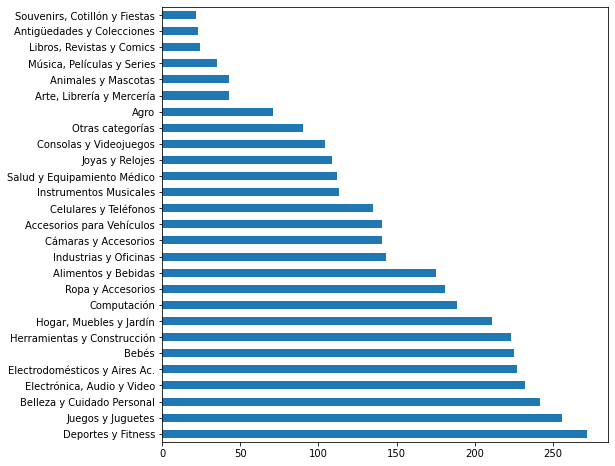

In [8]:
df_final_discount.root_category_name.value_counts().plot.barh(figsize=(8,8))

In [9]:
df_final_discount.dtypes["discount"]
df_final_discount.discount = df_final_discount.discount.apply(pd.to_numeric)

c:\users\a309549\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
df_final_discount.groupby("root_category_name").agg({
    'discount': ['mean', 'min', 'max', 'count']
}).sort_values(('discount', 'count'), ascending=False)

discount                          
                                   mean       min       max count
root_category_name                                               
Deportes y Fitness             0.196057  0.049995  0.600120   272
Juegos y Juguetes              0.152740  0.049877  0.583565   256
Belleza y Cuidado Personal     0.227933  0.047157  0.679931   242
Electrónica, Audio y Video     0.184970  0.032616  0.550250   232
Electrodomésticos y Aires Ac.  0.191594  0.049998  0.500042   227
Bebés                          0.168467  0.049474  0.616253   225
Herramientas y Construcción    0.170992  0.037244  0.720000   223
Hogar, Muebles y Jardín        0.182282  0.046549  0.520002   211
Computación                    0.218094  0.049762  0.512317   189
Ropa y Accesorios              0.170750  0.049664  0.603656   181
Alimentos y Bebidas            0.168766  0.026786  0.566667   175
Industrias y Oficinas          0.177517  0.049864  0.684474   143
Accesorios para Vehículos      0.171628  0.049999  0.440000   141
Cámaras y Accesorios           0.227770  0.049991  0.503333   141
Celulares y Teléfonos          0.175701  0.019878  0.617696   135
Instrumentos Musicales         0.161344  0.000000  0.474844   113
Salud y Equipamiento Médico    0.184446  0.050000  0.500452   112
Joyas y Relojes                0.105658  0.050000  0.384675   109
Consolas y Videojuegos         0.163927  0.050000  0.480000   104
Otras categorías               0.095667  0.050000  0.360000    90
Agro                           0.157395  0.050000  0.418333    71
Arte, Librería y Mercería      0.071136  0.049988  0.170003    43
Animales y Mascotas            0.088011  0.050000  0.266071    43
Música, Películas y Series     0.179226  0.050000  0.500000    35
Libros, Revistas y Comics      0.085000  0.050000  0.250000    24
Antigüedades y Colecciones     0.076522  0.050000  0.190000    23
Souvenirs, Cotillón y Fiestas  0.111640  0.049988  0.310000    22

<AxesSubplot:title={'center':'discount'}, xlabel='root_category_name'>

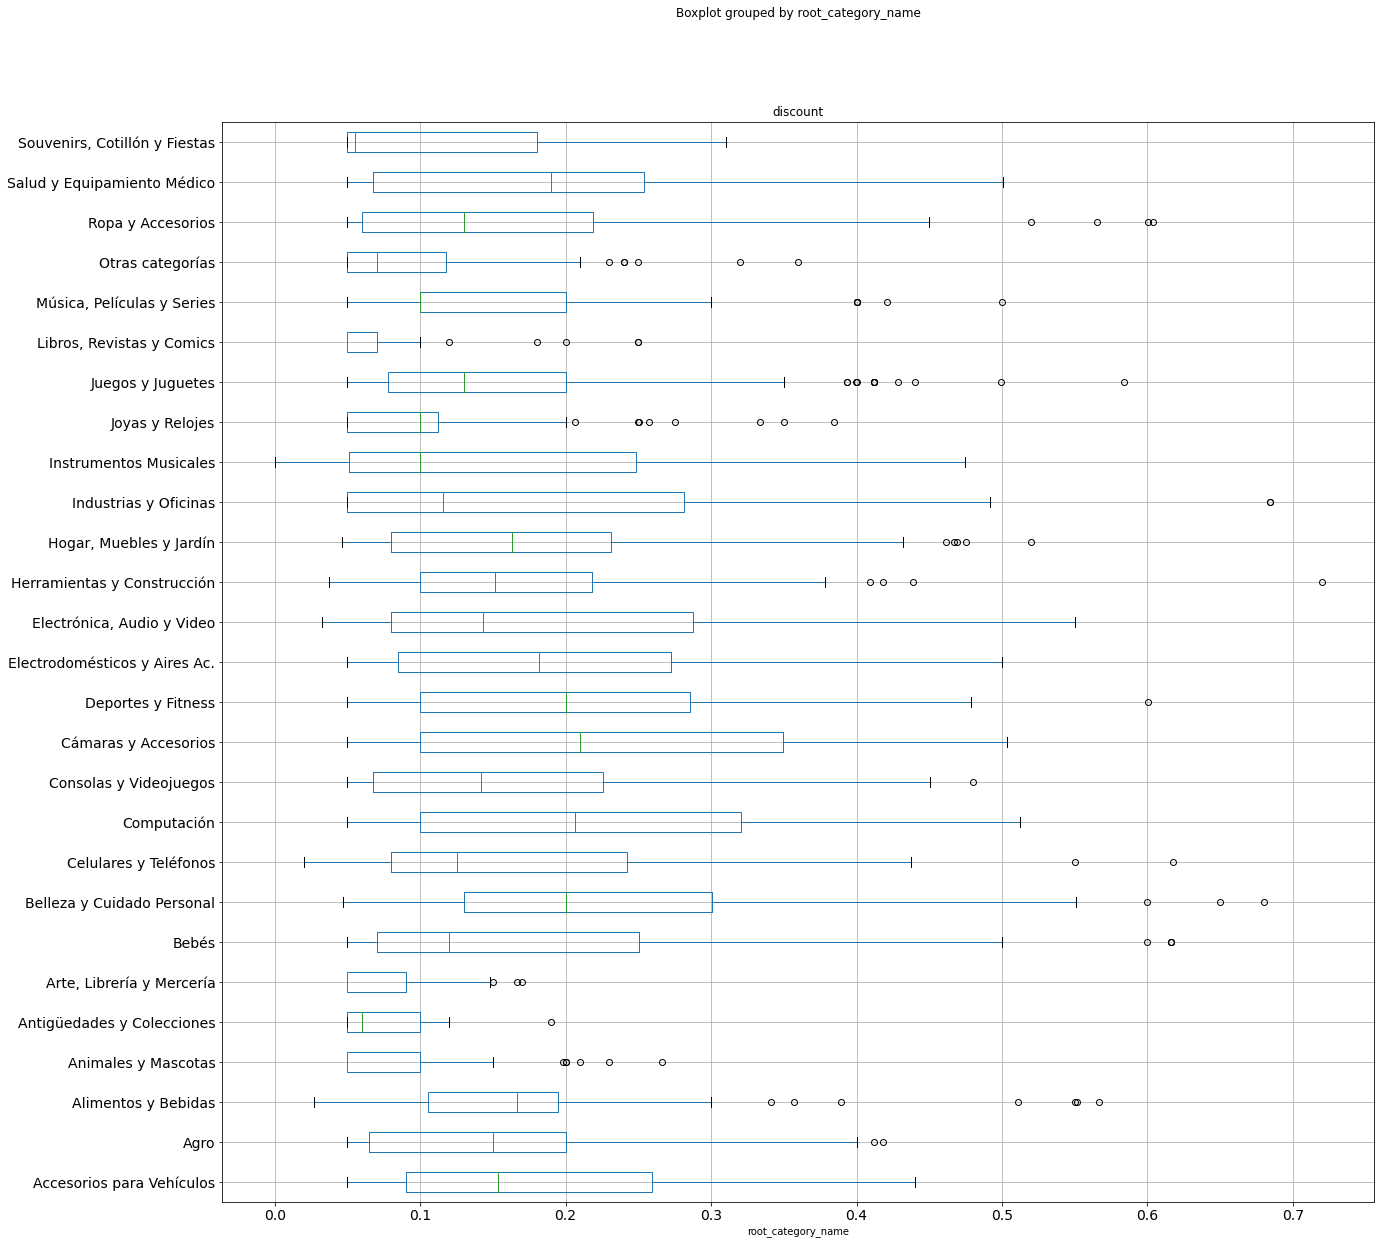

In [11]:
df_final_discount.boxplot(by='root_category_name', column=['discount'], figsize=(20,20), rot=0, vert=False, fontsize=14)


In [12]:
interval_index = pd.interval_range(start=0, end=1, periods=4)
interval_index

IntervalIndex([(0.0, 0.25], (0.25, 0.5], (0.5, 0.75], (0.75, 1.0]],
              closed='right',
              dtype='interval[float64]')

In [13]:
df_final_discount["discount_q"] = pd.cut(df_final_discount['discount'], interval_index,)
df_final_discount.head()


<ipython-input-13-6afa93d0c2fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_discount["discount_q"] = pd.cut(df_final_discount['discount'], interval_index,)


,installments.quantity,installments.rate,id,site_id,title,price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,condition,accepts_mercadopago,category_id,is_official_store,catalog_product_id,tags,catalog_listing,seller.id,seller.car_dealer,seller.real_estate_agency,seller.tags,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.sales.period,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,address.state_name,shipping.free_shipping,shipping.mode,shipping.tags,shipping.logistic_type,shipping.store_pick_up,seller.seller_reputation.real_level,root_category_id,root_category_name,discount,category_name,categories_from_root,discount_q
3,9.0,0.00,MLA836983125,MLA,Funda Cubre Rueda Auxilio Ford Ecosport,891.0,ARS,100,250,buy_it_now,gold_pro,new,True,MLA403345,False,NaN,"['brand_verified', 'good_quality_picture', 'go...",NaN,20861971,False,False,"['normal', 'user_info_verified', 'credits_prof...",1036.0,31.0,historic,0.01,0.99,0.00,1005.0,gold,0.0000,0.0000,60 days,455.0,0.0000,Capital Federal,False,me2,"['fulfillment', 'self_service_in']",fulfillment,False,NaN,MLA5725,Accesorios para Vehículos,0.100000,Fundas Cubre Ruedas,"['Accesorios para Vehículos', 'Accesorios de A...","(0.0, 0.25]"
7,12.0,70.17,MLA835929721,MLA,Soporte Respaldo Apoyo Lumbar Masajeador Asien...,700.0,ARS,100,500,buy_it_now,gold_special,new,True,MLA72278,False,NaN,"['good_quality_thumbnail', 'loyalty_discount_e...",NaN,76226771,False,False,"['normal', 'user_info_verified', 'credits_prio...",13366.0,729.0,historic,0.01,0.98,0.01,12637.0,platinum,0.0085,0.0129,60 days,3920.0,0.0014,Capital Federal,False,me2,"['fulfillment', 'self_service_in']",fulfillment,False,NaN,MLA5725,Accesorios para Vehículos,0.440000,Fundas para Asientos,"['Accesorios para Vehículos', 'Accesorios de A...","(0.25, 0.5]"
13,12.0,70.17,MLA836882881,MLA,Mini Compresor De Aire Portatil 12v 250 Psi Kl...,1003.0,ARS,500,500,buy_it_now,gold_special,new,True,MLA370797,True,MLA16223214,"['brand_verified', 'dragged_bids_and_visits', ...",NaN,417972986,False,False,"['brand', 'user_info_verified', 'large_seller'...",365811.0,16520.0,historic,0.03,0.96,0.01,349291.0,platinum,0.0066,0.0000,60 days,63054.0,0.0009,Buenos Aires,False,me2,['fulfillment'],fulfillment,False,NaN,MLA5725,Accesorios para Vehículos,0.196958,Mini Compresores,"['Accesorios para Vehículos', 'Herramientas', ...","(0.0, 0.25]"
14,12.0,70.17,MLA785918507,MLA,Kit Led Cree Cob H1 H7 H3 9005 12/24v 2019 C6+...,999.0,ARS,500,5000,buy_it_now,gold_special,new,True,MLA86681,False,NaN,"['good_quality_picture', 'good_quality_thumbna...",NaN,13647702,False,False,"['normal', 'user_info_verified', 'credits_prio...",238324.0,15850.0,historic,0.04,0.94,0.02,222474.0,platinum,0.0125,0.0090,60 days,65682.0,0.0053,Capital Federal,False,me2,"['fulfillment', 'self_service_out']",fulfillment,False,NaN,MLA5725,Accesorios para Vehículos,0.375625,LED,"['Accesorios para Vehículos', 'Tuning', 'Ilumi...","(0.25, 0.5]"
16,12.0,70.17,MLA836881964,MLA,Compresor De Aire Alto Impacto Portátil 250 Ps...,1599.0,ARS,500,500,buy_it_now,gold_special,new,True,MLA370797,True,MLA16452983,"['brand_verified', 'dragged_bids_and_visits', ...",NaN,417972986,False,False,"['brand', 'user_info_verified', 'large_seller'...",365811.0,16520.0,historic,0.03,0.96,0.01,349291.0,platinum,0.0066,0.0000,60 days,63054.0,0.0009,Buenos Aires,False,me2,"['fulfillment', 'fs_threshold_mla_change_feb20...",fulfillment,False,NaN,MLA5725,Accesorios para Vehícul

In [14]:
df_final_discount.groupby(["root_category_name", "discount_q"]).agg({
    "discount_q": ['count']
}).sort_values("root_category_name", ascending=False)

discount_q
                                               count
root_category_name            discount_q            
Souvenirs, Cotillón y Fiestas (0.75, 1.0]          0
                              (0.5, 0.75]          0
                              (0.25, 0.5]          1
                              (0.0, 0.25]         21
Salud y Equipamiento Médico   (0.75, 1.0]          0
                              (0.5, 0.75]          1
                              (0.25, 0.5]         33
                              (0.0, 0.25]         78
Ropa y Accesorios             (0.75, 1.0]          0
                              (0.5, 0.75]          4
                              (0.25, 0.5]         36
                              (0.0, 0.25]        141
Otras categorías              (0.25, 0.5]          2
                              (0.0, 0.25]         88
                              (0.75, 1.0]          0
                              (0.5, 0.75]          0
Música, Películas y Series    (0.75, 1.0]          0
                              (0.5, 0.75]          0
                              (0.25, 0.5]          8
                              (0.0, 0.25]         27
Libros, Revistas y Comics     (0.75, 1.0]          0
                              (0.5, 0.75]          0
                              (0.25, 0.5]          0
                              (0.0, 0.25]         24
Juegos y Juguetes             (0.25, 0.5]         35
                              (0.0, 0.25]        220
                              (0.5, 0.75]          1
                              (0.75, 1.0]          0
Joyas y Relojes               (0.75, 1.0]          0
                              (0.5, 0.75]          0
                              (0.25, 0.5]          6
                              (0.0, 0.25]        103
Instrumentos Musicales        (0.75, 1.0]          0
                              (0.5, 0.75]          0
                              (0.25, 0.5]         28
                              (0.0, 0.25]         84
Industrias y Oficinas         (0.0, 0.25]        105
                              (0.25, 0.5]         36
                              (0.5, 0.75]          2
                              (0.75, 1.0]          0
Hogar, Muebles y Jardín       (0.75, 1.0]          0
                              (0.5, 0.75]          1
                              (0.25, 0.5]         46
                              (0.0, 0.25]        164
Herramientas y Construcción   (0.75, 1.0]          0
                              (0.5, 0.75]          1
                              (0.25, 0.5]         45
                              (0.0, 0.25]        177
Electrónica, Audio y Video    (0.5, 0.75]          2
                              (0.25, 0.5]         63
                              (0.0, 0.25]        167
                              (0.75, 1.0]          0
Electrodomésticos y Aires Ac. (0.75, 1.0]          0
                              (0.5, 0.75]          2
                              (0.25, 0.5]         67
                              (0.0, 0.25]        158
Deportes y Fitness            (0.75, 1.0]          0
                              (0.5, 0.75]          1
                              (0.25, 0.5]         95
                              (0.0, 0.25]        176
Cámaras y Accesorios          (0.75, 1.0]          0
                              (0.5, 0.75]          2
                              (0.25, 0.5]         64
                              (0.0, 0.25]         75
Consolas y Videojuegos        (0.5, 0.75]          0
                              (0.25, 0.5]         24
                              (0.0, 0.25]         80
                              (0.75, 1.0]          0
Computación                   (0.75, 1.0]          0
                              (0.5, 0.75]          2
                              (0.25, 0.5]         80
                              (0.0, 0.25]        107
Celulares y Teléfonos         (0.75, 1.0]          0
              

In [15]:
# podría poner proporciones o pintar intercalado el df para que se entienda mejor